In [ ]:
import pandas as pd
import requests
import csv
import re

r = requests.get('https://www.jobfeed.nl/api/v3/search?_fields=posting_id,job_title,full_text&date__range=now-2M__now&_limit=5000&job_title=senior|sr|medior|junior|jr',
                 auth=('ANONYMOUS', 'ANONYMOUS'))

results = pd.DataFrame(r.json()['results'])

def determine_seniority(title):
    seniority = ''
    if re.search(r'\b(senior|sr)\b', title, re.IGNORECASE):
        seniority = 'Senior'
    elif re.search(r'\b(medior)\b', title, re.IGNORECASE):
        seniority = 'Medior'
    elif re.search(r'\b(junior|jr)\b', title, re.IGNORECASE):
        seniority = 'Junior'
    return seniority

results['seniority_level'] = results['job_title'].apply(determine_seniority)

results[['posting_id', 'job_title', 'full_text', 'seniority_level']] \
    .to_csv('data/seniority-nl.csv', index=False, header=True, quoting=csv.QUOTE_ALL)

In [18]:
#import numpy as np
#np.random.shuffle(df.values)
#df = df.drop_duplicates(subset=['posting_id'])

In [44]:
df.to_csv('data/seniority-nl.csv', index=False)

In [40]:
from langdetect import detect
df['lang'] = df['full_text'].apply(detect)

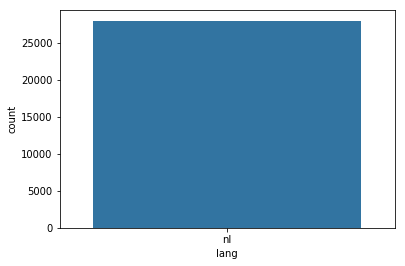

In [43]:
sns.countplot(x=df['lang'])

In [42]:
df = df[df.lang == 'nl']

In [45]:
import pandas as pd

df = pd.read_csv('data/seniority-nl.csv', index_col=None)

In [46]:
df.head(n=25)

,posting_id,job_title,full_text,seniority_level,lang
0,efaeaed6e438415c8f38171d25716f32,Senior Projectleider Bouw,Senior Projectleider Bouw\n\n Werkgever: Ce...,Senior,nl
1,018a0a712c444f38827a796cb8c4c72b,Gezocht: Medior Backend Developer /Uur,Gezocht: Medior Backend Developer /Uur\n\n ...,Medior,nl
2,654c5d51de3b44e2876d2fa88c20c418,Senior Schadebehandelaar Volmacht,* Zoekresultaat\n * Vacature\n\n Senior Sc...,Senior,nl
3,f2c5aed1e11c46ebb6c818b3f7b33235,Junior/medior software developer in het midden...,no.logo.alt\n no.logo.alt\n\n Junior/medio...,Medior,nl
4,58a1a5ffb56b48cdaedd9e9045e3a011,Medior belastingadviseur - (inter)nationale MK...,Medior belastingadviseur - (inter)nationale ...,Medior,nl
5,02d1517026dd44ffb2b688bed296138e,Junior Werkvoorbereider,Junior Werkvoorbereider\n\n Vacature omschr...,Junior,nl
6,94461eb87e5247158115c4e54eb1ca8d,Medior Consultant Microsoft s CRM,Medior Consultant Microsoft s CRM\n\n Job i...,Medior,nl
7,2ef2f40a028144f999f372cff76c4c71,Junior BRP Specialist,« Ga terug Print\n\n Junior BRP Specialist\...,Junior,nl
8,529ff3befb224338a6d1dd70f4ebd3be,Senior Payroll Officer - Amsterdam,Senior Payroll Officer - Amsterdam\n\n Wat ...,Senior,nl
9,3c1a9a405e66467da33027c8d36ef2a6,Medior Tester / geautomatiseerd testen / 2500 ...,Medior Tester / geautomatiseerd testen / 250...,Medior,nl


In [47]:
df.shape

(28026, 5)

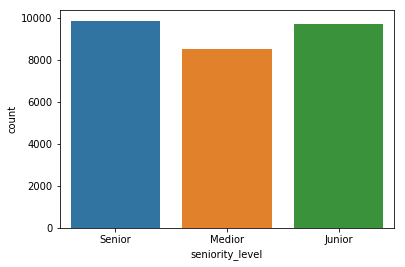

In [48]:
%matplotlib inline

import seaborn as sns

sns.countplot(x=df['seniority_level'])

In [49]:
from gensim.parsing.preprocessing import preprocess_string, RE_TAGS, strip_punctuation, stem_text, \
    strip_multiple_whitespaces, strip_numeric, remove_stopwords, strip_short, strip_non_alphanum
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder, MaxAbsScaler
from sklearn.decomposition import TruncatedSVD
from unicodedata import normalize

my_filters = [
    lambda x: x.lower(), strip_punctuation, strip_non_alphanum,
    strip_multiple_whitespaces, remove_stopwords
]

def my_tokenizer(s):
    return preprocess_string(s, filters=my_filters)

stop_words = ['junior', 'medior', 'senior']
    
vect = CountVectorizer(min_df=750, max_df=0.2, analyzer='word', tokenizer=my_tokenizer, ngram_range=(1, 3),
                       stop_words=stop_words)

le = LabelEncoder()

X = vect.fit_transform(df['full_text'])
y = le.fit_transform(df['seniority_level'])

In [50]:
X.shape

(28026, 2924)

In [51]:
y.shape

(28026,)

In [52]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC, LinearSVC

classifiers = [
    MultinomialNB(),
    LogisticRegression(solver='lbfgs', max_iter=1000, multi_class='multinomial'),
    #LogisticRegression(solver='lbfgs', max_iter=500, multi_class='multinomial', class_weight='balanced'),
]

for clf in classifiers:
    accs = cross_val_score(clf, X, y, cv=StratifiedKFold(n_splits=3, shuffle=True), scoring='accuracy')
    f1s = cross_val_score(clf, X, y, cv=StratifiedKFold(n_splits=3, shuffle=True), scoring='f1_macro')
    lls = cross_val_score(clf, X, y, cv=StratifiedKFold(n_splits=3, shuffle=True), scoring='neg_log_loss')

    print("{:>24} Accuracy: {:.2f} (+/- {:.2f}) F1: {:.2f} (+/- {:.2f}) Log loss: {:.2f} (+/- {:.2f})" \
          .format(clf.__class__.__name__, accs.mean(), accs.std(), f1s.mean(), f1s.std(), lls.mean(), lls.std()))

           MultinomialNB Accuracy: 0.61 (+/- 0.01) F1: 0.60 (+/- 0.00) Log loss: -8.07 (+/- 0.11)
      LogisticRegression Accuracy: 0.70 (+/- 0.00) F1: 0.70 (+/- 0.00) Log loss: -0.91 (+/- 0.01)


In [53]:
from sklearn.model_selection import train_test_split

Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.33, stratify=y)

#clf = MultinomialNB()
clf = LogisticRegression(solver='lbfgs', max_iter=1000, multi_class='multinomial')
clf.fit(Xtr, ytr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [54]:
from sklearn.metrics import classification_report

ypred = clf.predict(Xte)

print(classification_report(yte, ypred, target_names=le.classes_))

              precision    recall  f1-score   support

      Junior       0.78      0.78      0.78      3195
      Medior       0.65      0.67      0.66      2805
      Senior       0.67      0.65      0.66      3249

   micro avg       0.70      0.70      0.70      9249
   macro avg       0.70      0.70      0.70      9249
weighted avg       0.70      0.70      0.70      9249



In [55]:
le.classes_

array(['Junior', 'Medior', 'Senior'], dtype=object)

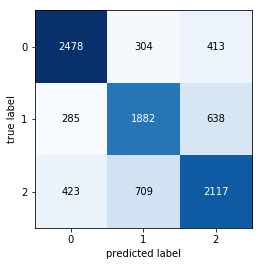

In [56]:
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(confusion_matrix(yte, ypred))

In [57]:
import numpy as np

feature_names = vect.get_feature_names()

for i, class_label in enumerate(le.classes_):
    top10 = np.argsort(clf.coef_[i])[-20:]
    print("%s: %s" % (class_label, ", ".join(feature_names[j] for j in top10)))
    print()

Junior: 2500, afgeronde mbo, uurloon, contactgegevens contactpersoon, 1 jaar, 2019 kunt, verwijderd, het maken van, starters, ga naar, industrial automation engineer, stage, applications, postcode plaats, datum geplaatst, met betrekking, 2 jaar, vaandel, ga naar website, starter

Medior: tell, en engelse taal, deze vacature wordt, vaardig en, uren fulltime, meer informatie deze, lees dan, en heb je, salaris vast, taal woord, ervaring meer, bedrijfsnaam, interne en externe, een pré je, een afgeronde mbo, gesolliciteerd op, deel deze, dienstverband vast contract, daarnaast ben je, listed

Senior: 4 jaar, snel mogelijk, vacaturekenmerken, contact met je, informatie deze, search jobs, interne en, geen beschrijving, jaar relevante, jouw wensen, je doen, taal woord en, een leaseauto, minimaal 2 jaar, dan snel verder, niet gewenst, years, minimaal 5, minimaal 3 jaar, 10 jaar

